<a href="https://colab.research.google.com/github/afsalmarattil/IndustrialEyes/blob/main/synthetic_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers scipy ftfy huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.3 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, revision="fp16"
)

pipeline = pipeline.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-v1-5 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.70k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/822 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
import os
import logging
from pathlib import Path
from IPython.display import Image, display


def generate_images(prompt, num_images_to_generate, num_images_per_prompt=4, guidance_scale=10, output_dir="generated_images", display_images=False):
    """
    Generate and optionally display a set of images based on a textual prompt.

    Args:
    prompt (str): The text prompt to generate images.
    num_images_to_generate (int): Total number of images to generate.
    num_images_per_prompt (int): Number of images to generate per prompt iteration.
    guidance_scale (int): The guidance scale to use for image generation.
    output_dir (str): The directory to save generated images.
    display_images (bool): Flag to display images inline after generation.

    Returns:
    None
    """
    # Check input values
    if num_images_to_generate < 1 or num_images_per_prompt < 1:
        raise ValueError("Number of images to generate must be at least 1.")
    if num_images_per_prompt > num_images_to_generate:
        raise ValueError("Number of images per prompt cannot exceed total number of images to generate.")

    num_iterations = num_images_to_generate // num_images_per_prompt
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)

    try:
        for i in range(num_iterations):
            images = pipeline(prompt, num_images_per_prompt=num_images_per_prompt, guidance_scale=guidance_scale)
            for idx, image in enumerate(images.images):
                image_name = output_path / f"image_{(i*num_images_per_prompt)+idx}.png"
                image.save(image_name)
                if display_images:
                    display(Image(filename=image_name, width=128, height=128))

    except Exception as e:
        print(f"Failed to generate or save images: {e}")

  0%|          | 0/50 [00:00<?, ?it/s]

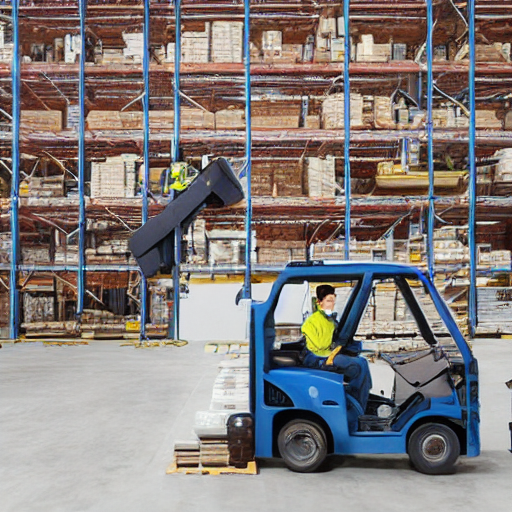

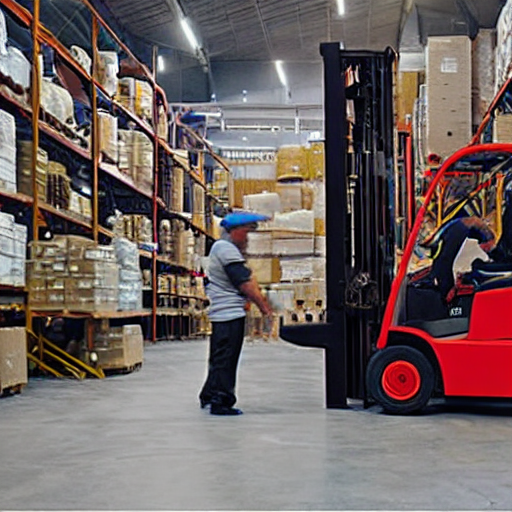

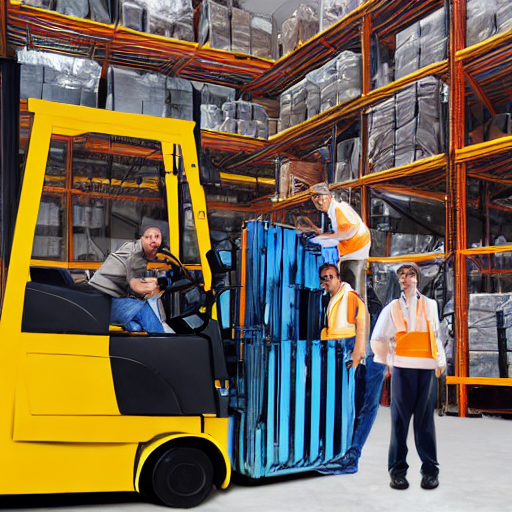

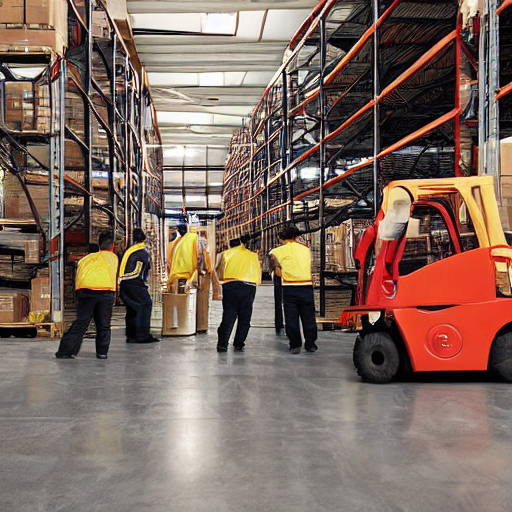

In [11]:
promt="Create a detailed and realistic image of a diverse group of workers operating a forklift inside a large, modern warehouse and there is nearmisses of forklifs."
generate_images(promt, 4, guidance_scale=4, display_images=True)